# Sprint1 Group2
## General Status of PH_SOA vs ASEAN

In [11]:
# Import libraries
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import numpy as np
import plotly.io as pio

In [12]:
# Load the data
data = pd.read_csv('../0-Data/micro_world.csv', encoding='ISO-8859-1')
data['SOA'] = [ 1 if x == 1 else 0 for x in data['fin16']]


# Define the age bin edges and labels
age_bins = [0, 18, 25, 35, 50, 65, 120]
age_labels = ['below 18', '18-24', '25-34', '35-49', '50-64', '65 and over']

# Convert the age column into age groups using pd.cut()
data['age_group'] = pd.cut(data['age'], bins=age_bins, labels=age_labels, include_lowest=True)

ph_data = data.query('economy == "Philippines"')

# Clustering
## Cluster PH_data to determine the features of SOA/~SOA 

In [13]:
#Clean and Prepare data for Clustering
# Filter data for Clustering
ph_data = ph_data.query('fin44a == 1 or fin44a == 2')
cluster=['age_group', 'emp_in', 'inc_q', 'account_fin', 'account_mob', 'saved', 'fin16']
cluster_data = ph_data[cluster]
cluster_data

,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16
90750,25-34,1.0,5,1,1.0,1,1
90751,18-24,1.0,4,1,0.0,1,1
90753,18-24,1.0,5,1,1.0,1,1
90754,25-34,1.0,3,0,0.0,1,2
90755,50-64,1.0,1,1,0.0,0,2
...,...,...,...,...,...,...,...
91745,25-34,1.0,5,1,1.0,0,2
91746,18-24,1.0,3,1,1.0,1,1
91747,below 18,2.0,1,0,0.0,0,2
91748,35-49,1.0,4,1,0.0,0,2


In [14]:
cluster_data = cluster_data.replace({
    'account_fin':{
    1:'Yes',
    0:'No'
    },
    
     'account_mob':{
    1:'Yes',
    0:'No'
    },
    
    'inc_q':{
    1:'Poorest 20%',
    2:'Next poorest 20%',
    3:'Middle 20%',
    4:'Next richest 20%',
    5:'Richest 20%',
    },
    
    'emp_in':{
    1:'Yes',
    2:'No'
    },
    
    'saved':{
    1:'Yes',
    0:'No'
    },

    
    'fin16':{
    1: 'Yes',
    2: 'No',
    3: 'No',
    4: 'No'
    }
    }
)

In [15]:
cluster_data

,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16
90750,25-34,Yes,Richest 20%,Yes,Yes,Yes,Yes
90751,18-24,Yes,Next richest 20%,Yes,No,Yes,Yes
90753,18-24,Yes,Richest 20%,Yes,Yes,Yes,Yes
90754,25-34,Yes,Middle 20%,No,No,Yes,No
90755,50-64,Yes,Poorest 20%,Yes,No,No,No
...,...,...,...,...,...,...,...
91745,25-34,Yes,Richest 20%,Yes,Yes,No,No
91746,18-24,Yes,Middle 20%,Yes,Yes,Yes,Yes
91747,below 18,No,Poorest 20%,No,No,No,No
91748,35-49,Yes,Next richest 20%,Yes,No,No,No


In [16]:
# Check nulls
cluster_data.isna().sum()

age_group      1
emp_in         0
inc_q          0
account_fin    0
account_mob    0
saved          0
fin16          0
dtype: int64

In [17]:
#Drop null
cluster_data = cluster_data.dropna(subset=['age_group'])
cluster_data.isna().sum()

age_group      0
emp_in         0
inc_q          0
account_fin    0
account_mob    0
saved          0
fin16          0
dtype: int64

In [18]:
# Create clustering function
def run_kmodes(n_clusters=None, cluster_data=None):
  # Initialize clustering
  kmodes = KModes(
      init="random",
      n_clusters=n_clusters,
      random_state=42,
      )
  
  # Apply clustering to the data
  kmodes.fit(cluster_data)

  return kmodes.labels_

In [19]:
# Run our K-Modes function for n_clusters
labels = run_kmodes(
  n_clusters=5,
  cluster_data=cluster_data
)

In [20]:
labels

array([1, 4, 1, 3, 2, 0, 2, 3, 0, 3, 1, 2, 1, 3, 1, 3, 4, 0, 2, 4, 0, 3,
       1, 4, 2, 1, 3, 3, 0, 1, 3, 2, 0, 1, 1, 0, 3, 2, 4, 2, 1, 3, 4, 0,
       1, 1, 2, 0, 1, 4, 4, 3, 1, 0, 0, 0, 3, 0, 1, 0, 2, 3, 2, 0, 0, 1,
       2, 1, 4, 1, 3, 0, 0, 0, 0, 3, 1, 0, 0, 4, 2, 2, 0, 2, 1, 0, 1, 0,
       0, 0, 2, 1, 3, 2, 2, 4, 0, 1, 4, 0, 2, 4, 3, 2, 2, 2, 0, 2, 0, 1,
       0, 1, 0, 3, 3, 2, 4, 2, 0, 0, 1, 0, 0, 3, 4, 3, 3, 0, 0, 1, 3, 2,
       1, 2, 1, 3, 4, 4, 3, 3, 2, 4, 1, 2, 4, 1, 1, 1, 1, 1, 2, 3, 0, 1,
       4, 0, 1, 1, 3, 3, 0, 0, 0, 0, 1, 1, 1, 2, 1, 0, 3, 0, 4, 4, 1, 4,
       0, 3, 0, 0, 1, 0, 1, 0, 4, 4, 1, 0, 4, 4, 2, 1, 0, 0, 2, 4, 0, 4,
       1, 4, 4, 0, 2, 0, 2, 2, 0, 2, 1, 0, 4, 1, 0, 1, 3, 3, 3, 4, 4, 0,
       1, 0, 0, 0, 1, 4, 0, 1, 0, 2, 4, 2, 4, 0, 0, 1, 2, 3, 3, 0, 3, 1,
       2, 2, 0, 1, 0, 2, 0, 4, 2, 0, 0, 1, 2, 0, 1, 1, 4, 4, 3, 2, 0, 1,
       2, 0, 3, 2, 2, 1, 1, 4, 3, 2, 2, 0, 1, 1, 1, 1, 0, 1, 3, 1, 2, 1,
       3, 1, 0, 0, 1, 0, 2, 0, 3, 4, 1, 1, 3, 2, 3,

In [21]:
# Append the labels to cluster data
cluster_data['labels'] = labels


/var/folders/dp/f1rjx5qn4sq784ngz540hkk00000gn/T/ipykernel_23614/4094440874.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['labels'] = labels


In [22]:
# Show data
cluster_data

,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16,labels
90750,25-34,Yes,Richest 20%,Yes,Yes,Yes,Yes,1
90751,18-24,Yes,Next richest 20%,Yes,No,Yes,Yes,4
90753,18-24,Yes,Richest 20%,Yes,Yes,Yes,Yes,1
90754,25-34,Yes,Middle 20%,No,No,Yes,No,3
90755,50-64,Yes,Poorest 20%,Yes,No,No,No,2
...,...,...,...,...,...,...,...,...
91745,25-34,Yes,Richest 20%,Yes,Yes,No,No,1
91746,18-24,Yes,Middle 20%,Yes,Yes,Yes,Yes,1
91747,below 18,No,Poorest 20%,No,No,No,No,0
91748,35-49,Yes,Next richest 20%,Yes,No,No,No,2


In [23]:
# Inspect the characteristics 
cluster_data.groupby('labels').agg(pd.Series.mode).sort_values(by='fin16')

,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16
labels,,,,,,,
0,18-24,No,Middle 20%,No,No,No,No
2,35-49,Yes,Next poorest 20%,No,No,No,No
3,25-34,Yes,Middle 20%,Yes,No,Yes,No
1,25-34,Yes,Richest 20%,Yes,Yes,Yes,Yes
4,35-49,Yes,Next richest 20%,Yes,No,Yes,Yes


In [24]:
cluster_data.reset_index()

,index,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16,labels
0,90750,25-34,Yes,Richest 20%,Yes,Yes,Yes,Yes,1
1,90751,18-24,Yes,Next richest 20%,Yes,No,Yes,Yes,4
2,90753,18-24,Yes,Richest 20%,Yes,Yes,Yes,Yes,1
3,90754,25-34,Yes,Middle 20%,No,No,Yes,No,3
4,90755,50-64,Yes,Poorest 20%,Yes,No,No,No,2
...,...,...,...,...,...,...,...,...,...
880,91745,25-34,Yes,Richest 20%,Yes,Yes,No,No,1
881,91746,18-24,Yes,Middle 20%,Yes,Yes,Yes,Yes,1
882,91747,below 18,No,Poorest 20%,No,No,No,No,0
883,91748,35-49,Yes,Next richest 20%,Yes,No,No,No,2


In [25]:
##### CREATE NEW VARIABLE FOR IDENTIFIER OF OLD AGE ####
cluster_data['save_old_age'] = cluster_data['fin16'].apply(
    lambda x: 1 if x == 'Yes' else 0
    )

cluster_data

/var/folders/dp/f1rjx5qn4sq784ngz540hkk00000gn/T/ipykernel_23614/2807377120.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['save_old_age'] = cluster_data['fin16'].apply(


,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16,labels,save_old_age
90750,25-34,Yes,Richest 20%,Yes,Yes,Yes,Yes,1,1
90751,18-24,Yes,Next richest 20%,Yes,No,Yes,Yes,4,1
90753,18-24,Yes,Richest 20%,Yes,Yes,Yes,Yes,1,1
90754,25-34,Yes,Middle 20%,No,No,Yes,No,3,0
90755,50-64,Yes,Poorest 20%,Yes,No,No,No,2,0
...,...,...,...,...,...,...,...,...,...
91745,25-34,Yes,Richest 20%,Yes,Yes,No,No,1,0
91746,18-24,Yes,Middle 20%,Yes,Yes,Yes,Yes,1,1
91747,below 18,No,Poorest 20%,No,No,No,No,0,0
91748,35-49,Yes,Next richest 20%,Yes,No,No,No,2,0


In [26]:
##### CREATE NEW VARIABLE FOR IDENTIFIER OF OLD AGE ####
cluster_data['inc'] = cluster_data['inc_q'].apply(
    lambda x: 1 if x == 'Yes' 
              2
    )

cluster_data

SyntaxError: invalid syntax (492234683.py, line 4)

In [ ]:
##### Group the data and apply aggregations ####
#### When using Aggregations you retain talbe (data frame)###

acct_fin = cluster_data.groupby(['account_fin']).agg(
    total_pop=('save_old_age', 'count'),
    save_old_age=('save_old_age', 'sum')
).reset_index()

acct_fin

,account_fin,total_pop,save_old_age
0,No,406,99
1,Yes,479,244


In [ ]:
#since acct_fin is already table format i just performed column computations#
acct_fin['did_not_save']=acct_fin['total_pop']-acct_fin['save_old_age']
acct_fin['save%']=round((acct_fin['save_old_age']/acct_fin['total_pop'])*100,2)
acct_fin['notsave%']=round((acct_fin['did_not_save']/acct_fin['total_pop'])*100,2)

acct_fin


,account_fin,total_pop,save_old_age,did_not_save,save%,notsave%
0,No,406,99,307,24.38,75.62
1,Yes,479,244,235,50.94,49.06


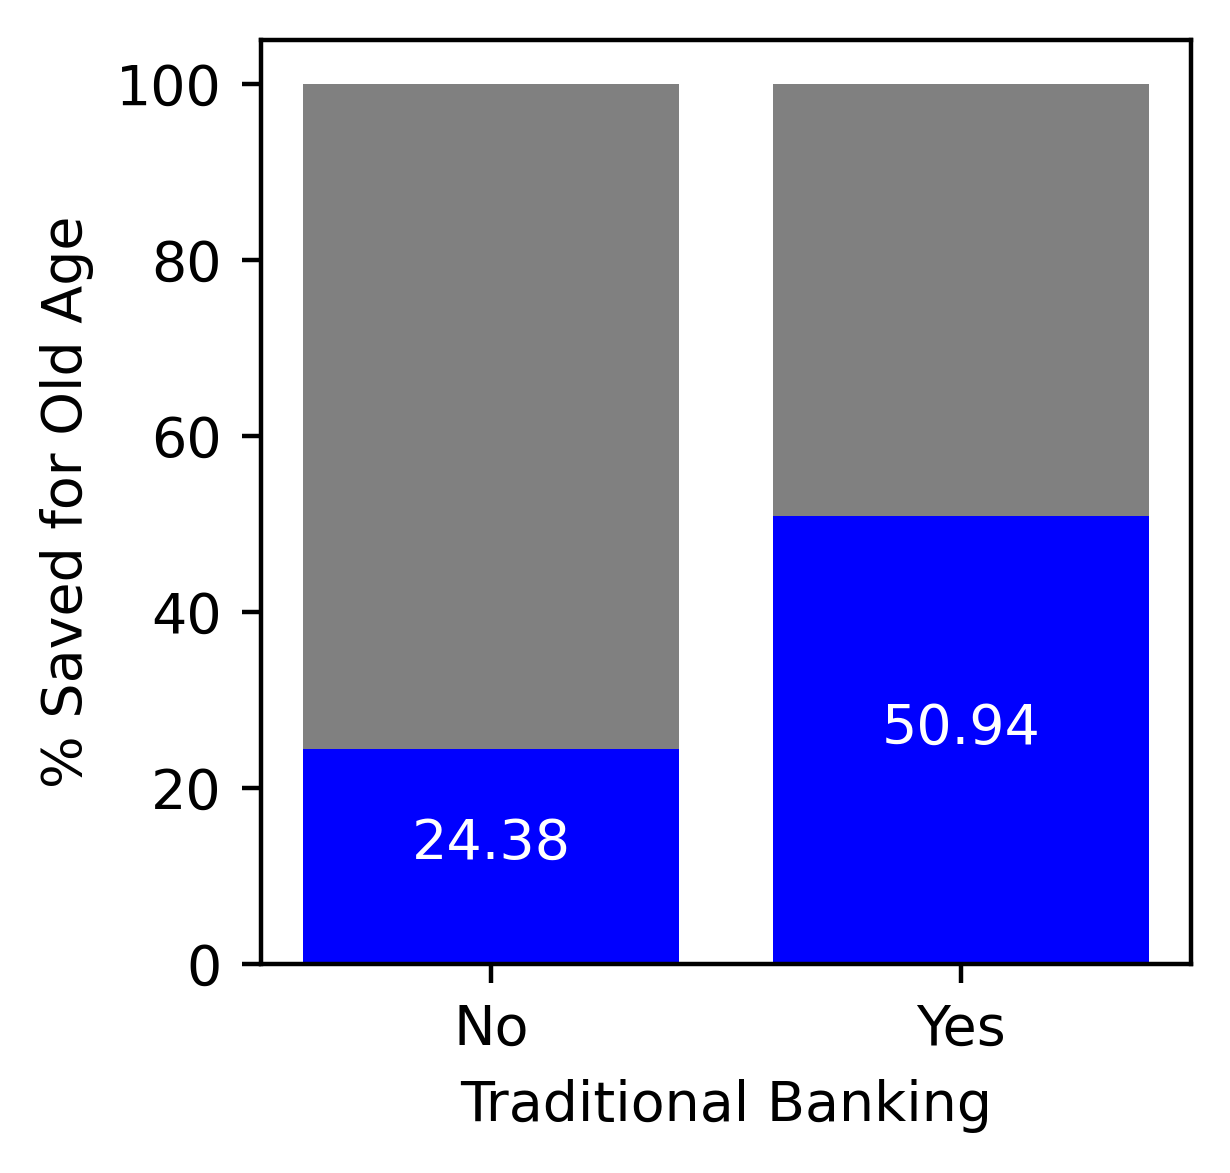

In [ ]:
### Stacked Bar chart ####

# Set figure size
plt.figure(figsize=(3,3)  , dpi=400)

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color='white')
 
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = acct_fin['account_fin']
    y = acct_fin['save%']
    

#plot bar    
plt.bar(acct_fin['account_fin'],acct_fin['save%'],color='b')

#plot 2nd bar for stacked bar specify order using "bottom"
plt.bar(acct_fin['account_fin'],acct_fin['notsave%'],bottom=acct_fin['save%'],color='grey')

# Set title
#plt.title('by Traditional Banking')

#axis labels
plt.xlabel('Traditional Banking')
plt.ylabel('% Saved for Old Age')

# Rotate x labels
plt.xticks(rotation=0)

addlabels(acct_fin['account_fin'],acct_fin['save%'])

#Save
plt.savefig('by TraditionalBanking.png', dpi=320,transparent=True, bbox_inches='tight')

plt.show()

In [ ]:
##### Group the data and apply aggregations ####
#### When using Aggregations you retain talbe (data frame)###

acct_mob = cluster_data.groupby(['account_mob']).agg(
    total_pop=('save_old_age', 'count'),
    save_old_age=('save_old_age', 'sum')
).reset_index()

acct_mob

#since acct_mob is already table format i just performed column computations#
acct_mob['did_not_save']=acct_mob['total_pop']-acct_mob['save_old_age']
acct_mob['save%']=round((acct_mob['save_old_age']/acct_mob['total_pop'])*100,2)
acct_mob['notsave%']=round((acct_mob['did_not_save']/acct_mob['total_pop'])*100,2)

acct_mob


,account_mob,total_pop,save_old_age,did_not_save,save%,notsave%
0,No,640,212,428,33.12,66.88
1,Yes,245,131,114,53.47,46.53


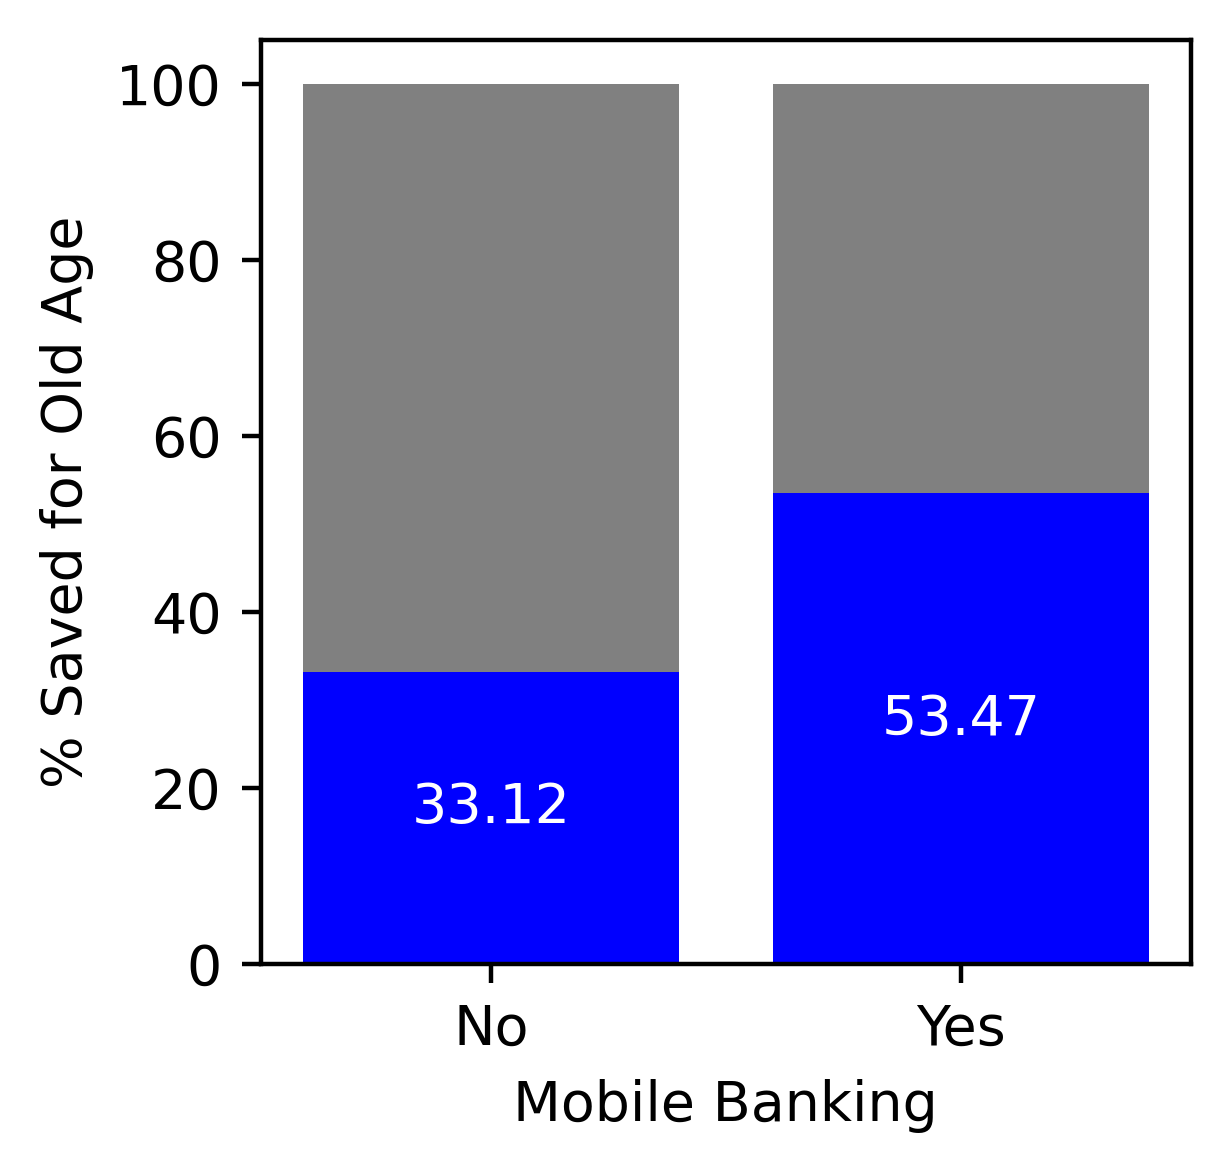

In [ ]:
### Stacked Bar chart ####

# Set figure size
plt.figure(figsize=(3,3)  , dpi=400)

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center',color='white')
 
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = acct_mob['account_mob']
    y = acct_mob['save%']
    

#plot bar    
plt.bar(acct_mob['account_mob'],acct_mob['save%'],color='b')

#plot 2nd bar for stacked bar specify order using "bottom"
plt.bar(acct_mob['account_mob'],acct_mob['notsave%'],bottom=acct_mob['save%'],color='grey')

# Set title
#plt.title('by Mobile Banking')

#axis labels
plt.xlabel('Mobile Banking')
plt.ylabel('% Saved for Old Age')

# Rotate x labels
plt.xticks(rotation=0)

addlabels(acct_mob['account_mob'],acct_mob['save%'])

#Save
plt.savefig('by MobileBanking.png', dpi=320,transparent=True, bbox_inches='tight')

plt.show()

In [ ]:
cluster_data

,age_group,emp_in,inc_q,account_fin,account_mob,saved,fin16,labels,save_old_age
90750,25-34,Yes,Richest 20%,Yes,Yes,Yes,Yes,1,1
90751,18-24,Yes,Next richest 20%,Yes,No,Yes,Yes,4,1
90753,18-24,Yes,Richest 20%,Yes,Yes,Yes,Yes,1,1
90754,25-34,Yes,Middle 20%,No,No,Yes,No,3,0
90755,50-64,Yes,Poorest 20%,Yes,No,No,No,2,0
...,...,...,...,...,...,...,...,...,...
91745,25-34,Yes,Richest 20%,Yes,Yes,No,No,1,0
91746,18-24,Yes,Middle 20%,Yes,Yes,Yes,Yes,1,1
91747,below 18,No,Poorest 20%,No,No,No,No,0,0
91748,35-49,Yes,Next richest 20%,Yes,No,No,No,2,0


In [ ]:
##### Group the data and apply aggregations ####
#### When using Aggregations you retain talbe (data frame)###

emp = cluster_data.groupby(['emp_in']).agg(
    total_pop=('save_old_age', 'count'),
    save_old_age=('save_old_age', 'sum')
).reset_index()

emp

#since acct_fin is already table format i just performed column computations#
emp['did_not_save']=emp['total_pop']-emp['save_old_age']
emp['save%']=round((emp['save_old_age']/emp['total_pop'])*100,2)
emp['notsave%']=round((emp['did_not_save']/emp['total_pop'])*100,2)

emp


,emp_in,total_pop,save_old_age,did_not_save,save%,notsave%
0,No,264,76,188,28.79,71.21
1,Yes,621,267,354,43.00,57.00


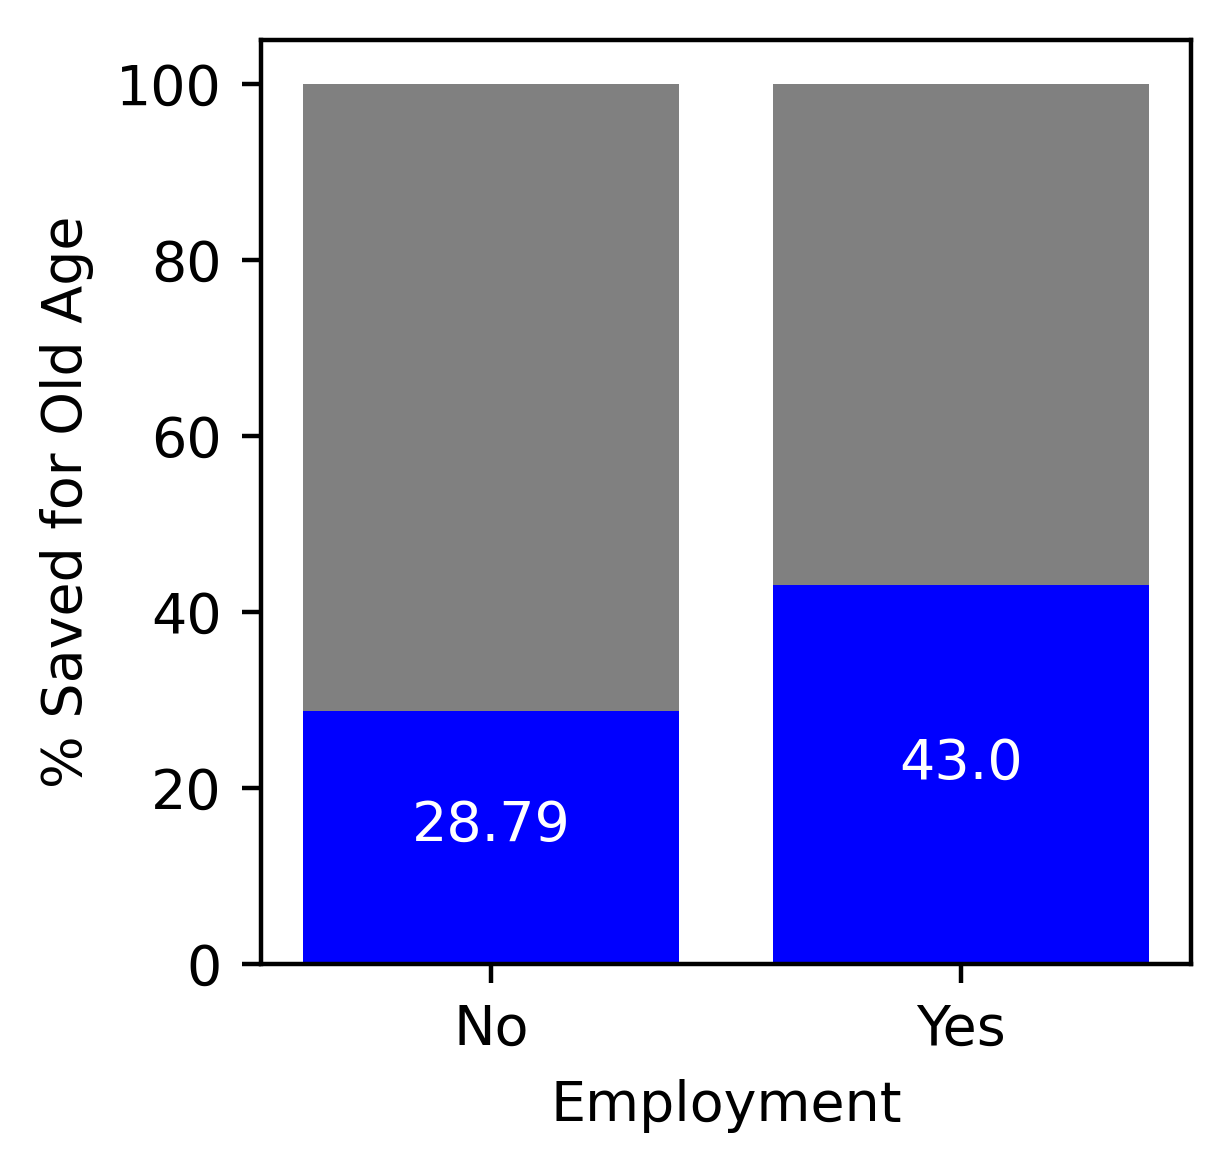

In [ ]:
### Stacked Bar chart ####

# Set figure size
plt.figure(figsize=(3,3)  , dpi=400)

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center',color='white')
 
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = emp['emp_in']
    y = emp['save%']
    

#plot bar    
plt.bar(emp['emp_in'],emp['save%'],color='b')

#plot 2nd bar for stacked bar specify order using "bottom"
plt.bar(emp['emp_in'],emp['notsave%'],bottom=emp['save%'],color='grey')

# Set title
#plt.title('by Mobile Banking')

#axis labels
plt.xlabel('Employment')
plt.ylabel('% Saved for Old Age')

# Rotate x labels
plt.xticks(rotation=0)

addlabels(emp['emp_in'],emp['save%'])

#Save
plt.savefig('by Employment.png', dpi=320,transparent=True, bbox_inches='tight')

plt.show()

In [ ]:
cluster_data2 = cluster_data.replace(
    {
    'inc_q':{
    'Poorest 20%':1,
    'Next poorest 20%':2,
    'Middle 20%':3,
    'Next richest 20%':4,
    'Richest 20%':5,
    }})

In [ ]:
##### Group the data and apply aggregations ####
#### When using Aggregations you retain talbe (data frame)###

inc = cluster_data2.groupby(['inc_q']).agg(
    total_pop=('save_old_age', 'count'),
    save_old_age=('save_old_age', 'sum')
).reset_index()

inc


#since acct_fin is already table format i just performed column computations#
inc['did_not_save']=inc['total_pop']-inc['save_old_age']
inc['save%']=round((inc['save_old_age']/inc['total_pop'])*100,2)
inc['notsave%']=round((inc['did_not_save']/inc['total_pop'])*100,2)

inc

,inc_q,total_pop,save_old_age,did_not_save,save%,notsave%
0,1,138,30,108,21.74,78.26
1,2,140,36,104,25.71,74.29
2,3,192,61,131,31.77,68.23
3,4,184,76,108,41.30,58.70
4,5,231,140,91,60.61,39.39


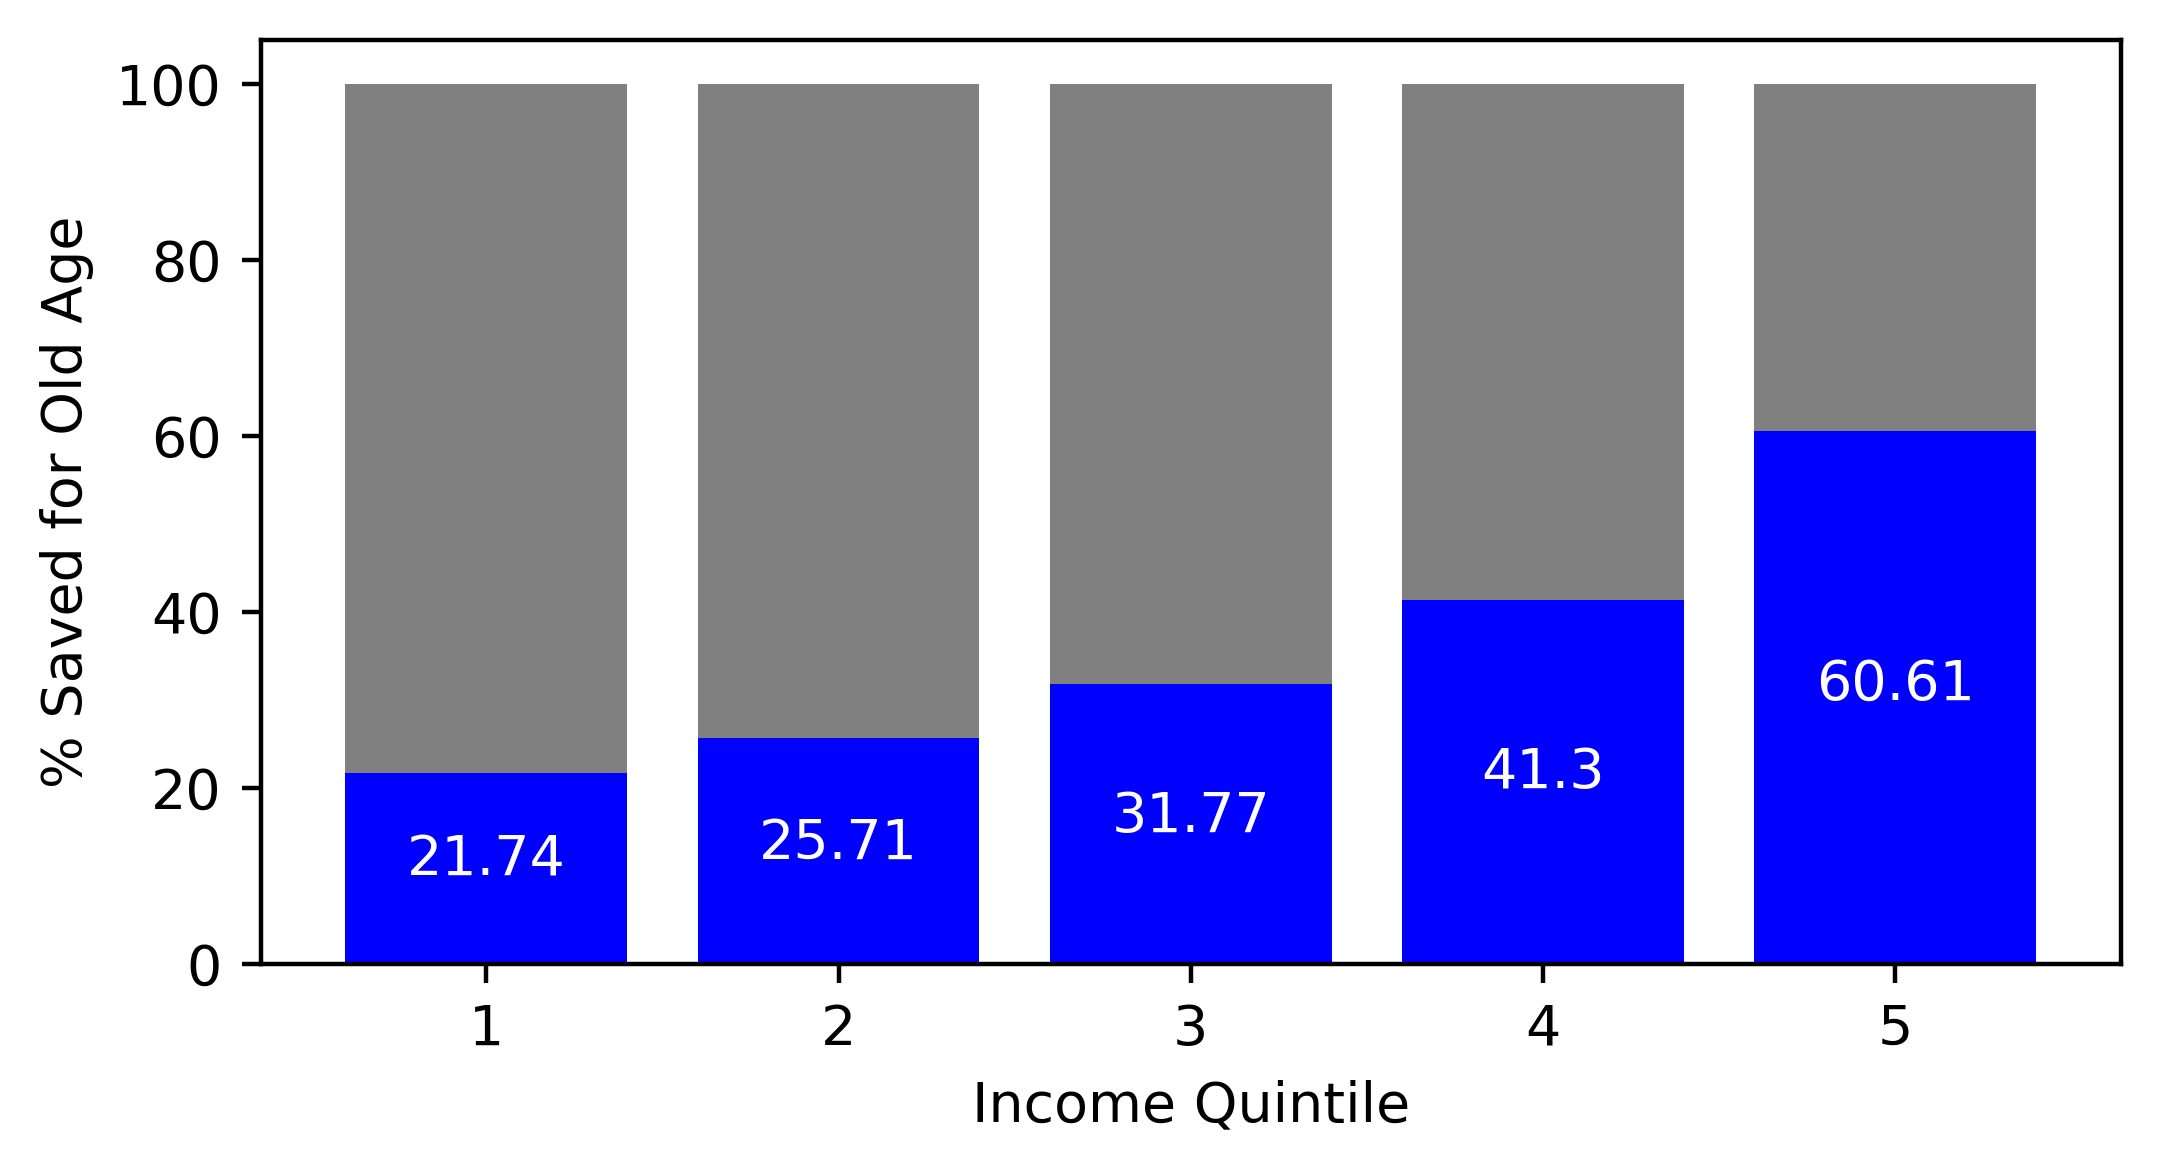

In [ ]:
### Stacked Bar chart ####

# Set figure size
plt.figure(figsize=(6,3)  , dpi=400)

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i+1, y[i]//2, y[i], ha = 'center', color='white')
 
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = inc['inc_q']
    y = inc['save%']
    

#plot bar    
plt.bar(inc['inc_q'],inc['save%'],color='b')

#plot 2nd bar for stacked bar specify order using "bottom"
plt.bar(inc['inc_q'],inc['notsave%'],bottom=inc['save%'],color='grey')

# Set title
#plt.title('by Mobile Banking')

#axis labels
plt.xlabel('Income Quintile')
plt.ylabel('% Saved for Old Age')

# Rotate x labels
plt.xticks(rotation=0)

addlabels(inc['inc_q'],inc['save%'])

#Save
plt.savefig('by Income.png', dpi=320,transparent=True, bbox_inches='tight')

plt.show()

In [ ]:
##### Group the data and apply aggregations ####
#### When using Aggregations you retain talbe (data frame)###

age = cluster_data.groupby(['age_group']).agg(
    total_pop=('save_old_age', 'count'),
    save_old_age=('save_old_age', 'sum')
).reset_index()

age


#since acct_fin is already table format i just performed column computations#
age['did_not_save']=age['total_pop']-age['save_old_age']
age['save%']=round((age['save_old_age']/age['total_pop'])*100,2)
age['notsave%']=round((age['did_not_save']/age['total_pop'])*100,2)

age

,age_group,total_pop,save_old_age,did_not_save,save%,notsave%
0,below 18,93,33,60,35.48,64.52
1,18-24,215,80,135,37.21,62.79
2,25-34,264,111,153,42.05,57.95
3,35-49,224,90,134,40.18,59.82
4,50-64,72,23,49,31.94,68.06
5,65 and over,17,6,11,35.29,64.71


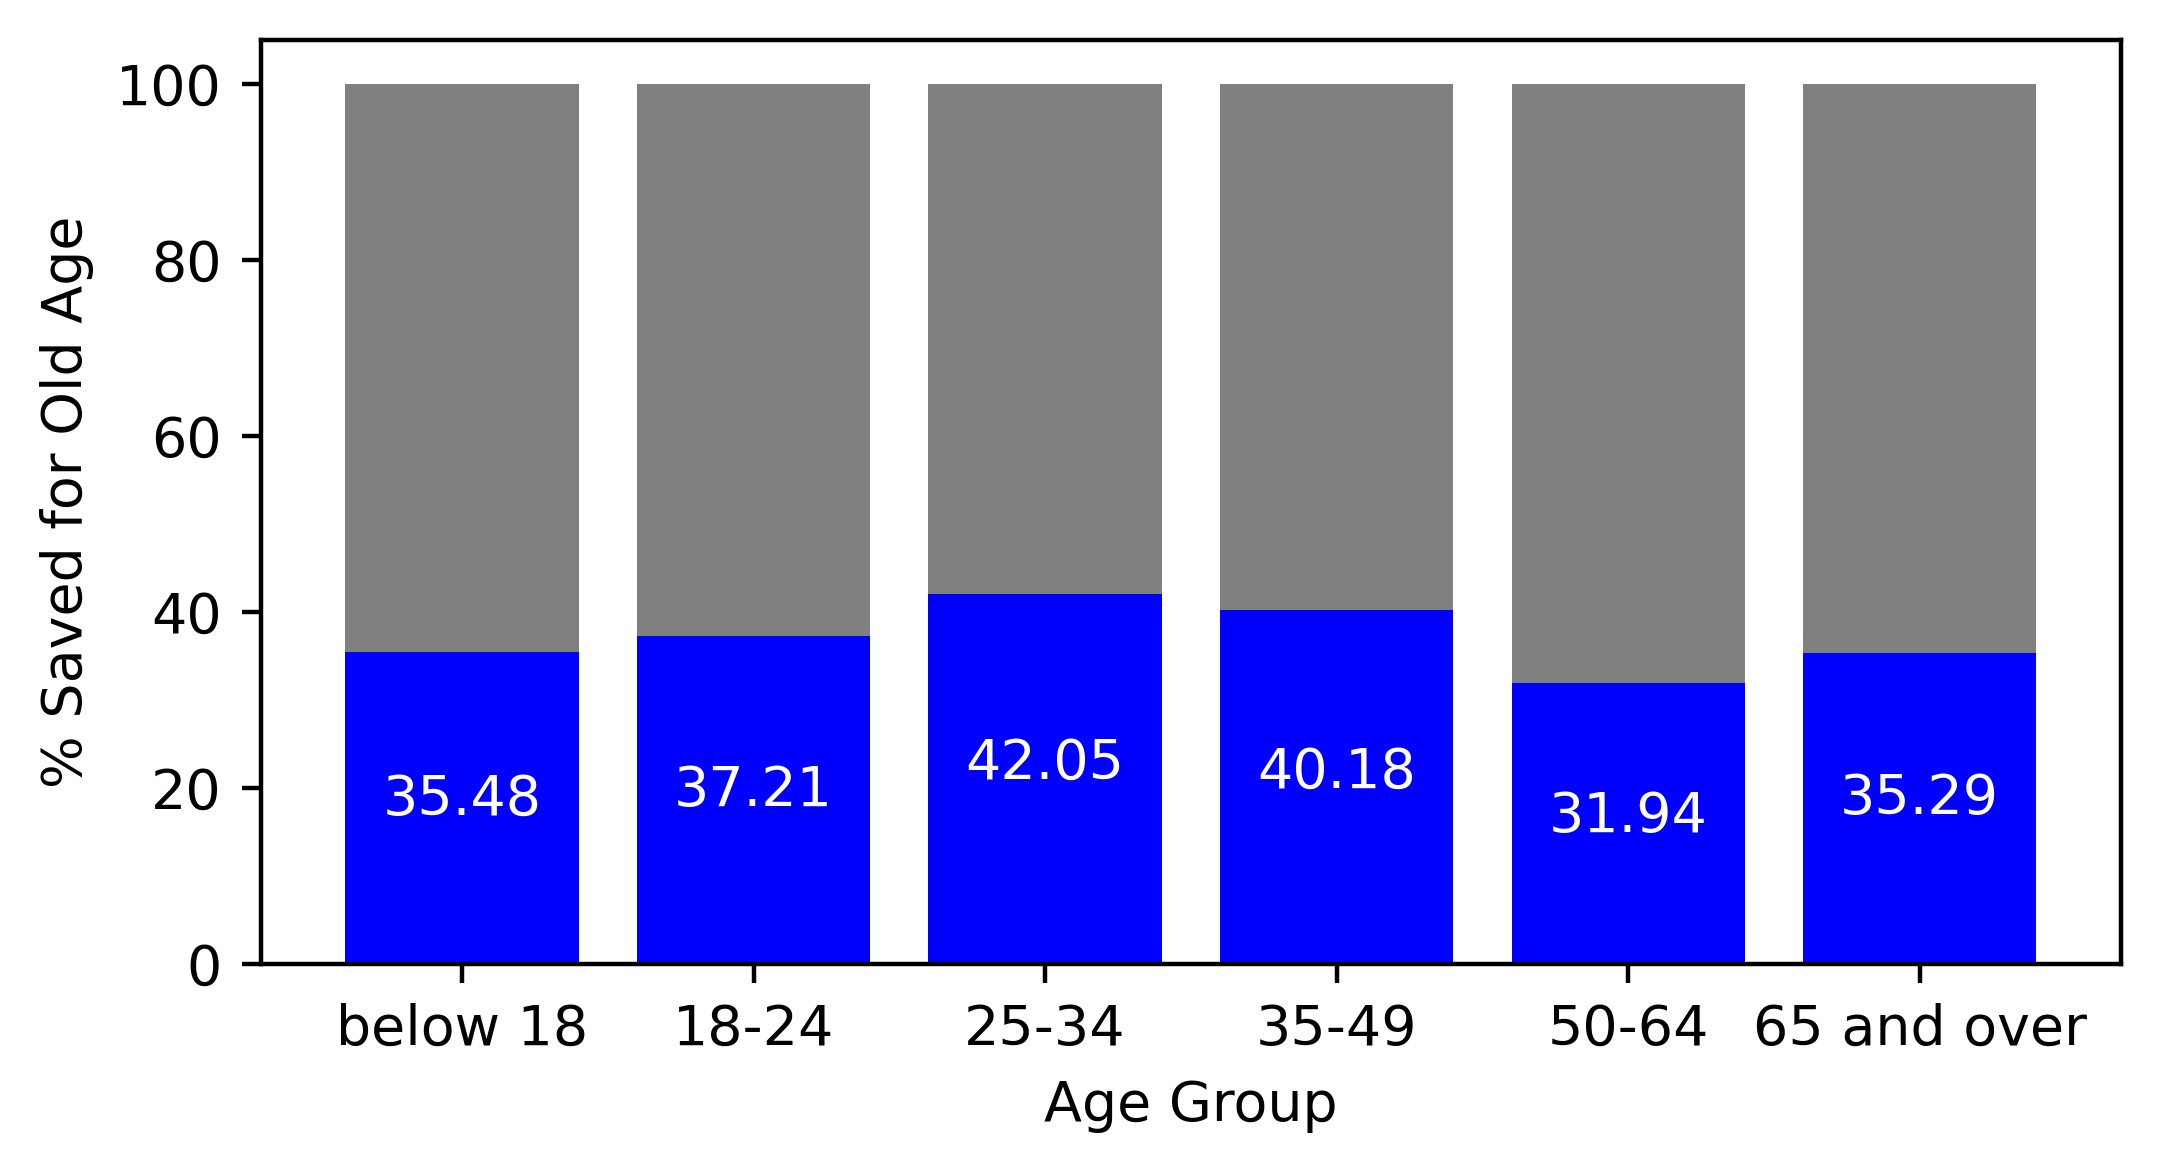

In [ ]:
### Stacked Bar chart ####

# Set figure size
plt.figure(figsize=(6,3)  , dpi=400)

# function to add value labels
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center', color='white')
 
if __name__ == '__main__':
    # creating data on which bar chart will be plot
    x = age['age_group']
    y = age['save%']
    

#plot bar    
plt.bar(age['age_group'],age['save%'],color='b')

#plot 2nd bar for stacked bar specify order using "bottom"
plt.bar(age['age_group'],age['notsave%'],bottom=age['save%'],color='grey')

# Set title
#plt.title('by Mobile Banking')

#axis labels
plt.xlabel('Age Group')
plt.ylabel('% Saved for Old Age')

# Rotate x labels
plt.xticks(rotation=0)

addlabels(age['age_group'],age['save%'])

#Save
plt.savefig('by Age.png', dpi=320,transparent=True, bbox_inches='tight')

plt.show()

In [37]:
##### Group the data and apply aggregations ####
#### When using Aggregations you retain talbe (data frame)###
import streamlit as st
save = cluster_data.groupby(['saved']).agg(
    total_pop=('save_old_age', 'count'),
).reset_index()

save



,saved,total_pop
0,No,326
1,Yes,559


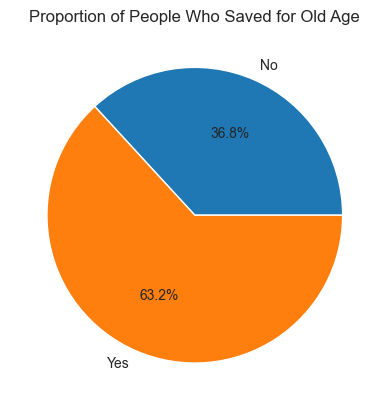

In [45]:
fig, ax = plt.subplots()
ax.pie(save['total_pop'], labels=save['saved'], autopct='%1.1f%%')
ax.set_title('Proportion of People Who Saved for Old Age')

# display the chart using plt.show()
plt.show()


In [44]:
# create the pie chart using Plotly Express
fig = px.pie(save, values='total_pop', names='saved')

# display the chart using Streamlit


DeltaGenerator(_root_container=0, _provided_cursor=None, _parent=None, _block_type=None, _form_data=None)